# Predicting income on Census data

In [35]:
##importing all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

### The Train Data & its preprocessing

In [36]:
dt=pd.read_csv('C:/Users/rajka/Downloads/codes/cencus/train.csv')

In [37]:
X_train = dt
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
X_train.shape

(32561, 15)

In [39]:
col_names = X_train.columns
num_data = X_train.shape[0]
for c in col_names:
    num_non = X_train[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native-country
583
1.79%




In [40]:
X_train = X_train[X_train["workclass"] != " ?"]
X_train = X_train[X_train["occupation"] != " ?"]
X_train = X_train[X_train["native-country"] != " ?"]

In [41]:
X_train.shape

(30162, 15)

In [42]:
X_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
X_train.rename(columns={'marital-status': 'status'}, inplace=True)

In [44]:
X_train.rename(columns={'native-country': 'country'}, inplace=True)

In [45]:
#scaling the features 
from sklearn import preprocessing
prepro = preprocessing.LabelEncoder()
X_train.workclass = prepro.fit_transform(X_train.workclass)
X_train.education = prepro.fit_transform(X_train.education)
X_train.race = prepro.fit_transform(X_train.race)
X_train.occupation = prepro.fit_transform(X_train.occupation)
X_train.relationship = prepro.fit_transform(X_train.relationship)
X_train.sex = prepro.fit_transform(X_train.sex)
X_train.status = prepro.fit_transform(X_train.status)
X_train.country = prepro.fit_transform(X_train.country)

In [46]:
X_train.head(5)

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [47]:
labels = [' <=50K', ' >50K']

encoder = preprocessing.LabelEncoder()
encoder.fit(labels)

for i, item in enumerate(encoder.classes_):
    print(item, '=>', i)

 <=50K => 0
 >50K => 1


In [48]:
X_train['class'] = encoder.transform(X_train['class'])
Y_train= X_train['class']
X_train.drop('class', axis=1)

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38


In [49]:
Y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### The Test Data & its preprocessing

In [50]:
dt_part_2=pd.read_csv('C:/Users/rajka/Downloads/codes/cencus/test.csv')

In [51]:
X_test = dt_part_2
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [52]:
X_test.shape

(16281, 15)

In [53]:
col_names = X_test.columns
num_data = X_test.shape[0]
for c in col_names:
    num_non = X_test[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
963
5.91%


occupation
966
5.93%


native-country
274
1.68%




In [54]:
X_test = X_test[X_test["workclass"] != " ?"]
X_test = X_test[X_test["occupation"] != " ?"]
X_test = X_test[X_test["native-country"] != " ?"]

In [55]:
X_test.shape

(15060, 15)

In [56]:
X_test.rename(columns={'marital-status': 'status'}, inplace=True)
X_test.rename(columns={'native-country': 'country'}, inplace=True)

In [57]:
#scaling the features 
from sklearn import preprocessing
prepro = preprocessing.LabelEncoder()
X_test.workclass = prepro.fit_transform(X_test.workclass)
X_test.education = prepro.fit_transform(X_test.education)
X_test.race = prepro.fit_transform(X_test.race)
X_test.occupation = prepro.fit_transform(X_test.occupation)
X_test.relationship = prepro.fit_transform(X_test.relationship)
X_test.sex = prepro.fit_transform(X_test.sex)
X_test.status = prepro.fit_transform(X_test.status)
X_test.country = prepro.fit_transform(X_test.country)

In [58]:
X_test.head(5)

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,>50K
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [59]:
labels = [' <=50K', ' >50K']
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)
for i, item in enumerate(encoder.classes_):
    print(item, '=>', i)

 <=50K => 0
 >50K => 1


In [60]:
X_test['class'] = encoder.transform(X_test['class'])
Y_test= X_test['class']
X_test.drop('class', axis=1)
Y_test.head()

0    0
1    0
2    1
3    1
5    0
Name: class, dtype: int64

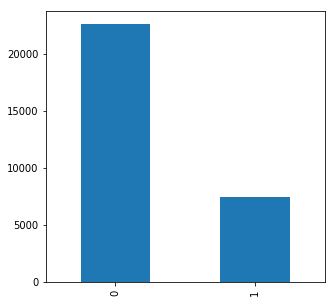

In [61]:
%matplotlib inline
#Visualize column salary of the dataframe
Y_train.value_counts()

Y_train.value_counts().plot(kind='bar',figsize=(5,5))

#### as we can see the there is a bigger difference between the salary class in our training data . which can lead into imbalance prediction. to counter this issue we overpopulate our training data with SMOTE method


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")
X_sm, Y_sm = smote.fit_sample(X_train, Y_train)

### logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_sm, Y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# use the model to make predictions with the test data
Y_logpred = logreg.predict(X_test)
Y_logpred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [65]:
# how did our model perform?
count_misclassified = (Y_test != Y_logpred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, Y_logpred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 1.00
